<a href="https://colab.research.google.com/github/AryanSahu13/LWSProject2/blob/main/MinorProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aryan Sahu, Minor Project 2, Learnwik Solutions

#**Minor Project 2: Image Classification using Convolutional Neural Network**

Dataset: CIFAR-10 dataset

Algorithm: Convolutional Neural Network (CNN)

Methodology:

Load the CIFAR-10 dataset and split it into training and testing sets

Preprocess the data by normalizing and resizing the images

Build a CNN model using Keras

Train the model on the training set and evaluate it on the testing set

Visualize the model's performance using confusion matrix and classification report

Step 1: Import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras

Step 2: Load the CIFAR-10 dataset

In [ ]:
cifar10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


Step 3: Preprocess the data

In [ ]:
# Normalize the pixel values between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

Step 4: Build the CNN model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Step 5: Compile and train the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Step 6: Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6055 - accuracy: 0.7883 - val_loss: 0.8841 - val_accuracy: 0.7059
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.5417 - accuracy: 0.8101 - val_loss: 0.8944 - val_accuracy: 0.7127
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.4777 - accuracy: 0.8326 - val_loss: 0.9442 - val_accuracy: 0.7103
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.4144 - accuracy: 0.8541 - val_loss: 1.0075 - val_accuracy: 0.7009
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.3613 - accuracy: 0.8747 - val_loss: 1.1136 - val_accuracy: 0.6985
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.3151 - accuracy: 0.8890 - val_loss: 1.1431 - val_accuracy: 0.6945
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.2679 - accuracy: 0.9046 - val_loss: 1.1982 -

Step 7: Evaluate the model on the testing set


In [ ]:
_, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.6145 - accuracy: 0.6944
Test accuracy: 0.6944000124931335


Step 8: Visualize the model's performance

In [ ]:
# Predict the labels for the testing set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Generate a classification report
cr = classification_report(y_test, y_pred)

# Print the confusion matrix and classification report
print('Confusion Matrix:')
print(cm)
print('\nClassification Report:')
print(cr)

313/313 [==============================] - 4s 11ms/step
Confusion Matrix:
[[697  17  80  23  14  15  14  11  78  51]
 [ 15 797  13   9   5   7   6   1  32 115]
 [ 55   4 673  67  58  42  60  23  11   7]
 [ 22  14  96 523  54 150  84  25  13  19]
 [ 23   9  98  67 627  36  67  59   9   5]
 [ 10   4  78 220  41 555  39  43   4   6]
 [  3   3  79  63  35  10 794   3   5   5]
 [ 22   4  62  67  57  54  18 700   3  13]
 [ 55  40  19  31   9  11   7   5 794  29]
 [ 35  76  25  14   6  10   9  16  25 784]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72      1000
           1       0.82      0.80      0.81      1000
           2       0.55      0.67      0.61      1000
           3       0.48      0.52      0.50      1000
           4       0.69      0.63      0.66      1000
           5       0.62      0.56      0.59      1000
           6       0.72      0.79      0.76      1000
           7       0.79      0.70     

Step 9: Plot accuracy and loss curves

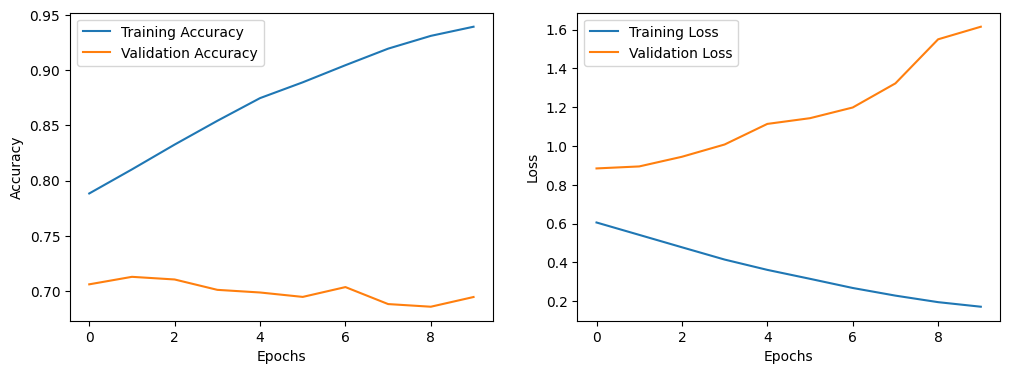

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()